## Import modules

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

## 1. Data Input

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
req = requests.get(url)

pure_string = str(req.content).replace("b'","").split("\\n")
pure_string.pop()

dataset = []
for line in pure_string:
    tmp = []
    for ch in line:
        if not ch == ",":
            tmp.append(ch)
    dataset.append(tmp)

dataset = pd.DataFrame(dataset)
display(dataset)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


## 2. Data Visulization

<ipython-input-3-fea107b8cd9a>:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1,3)


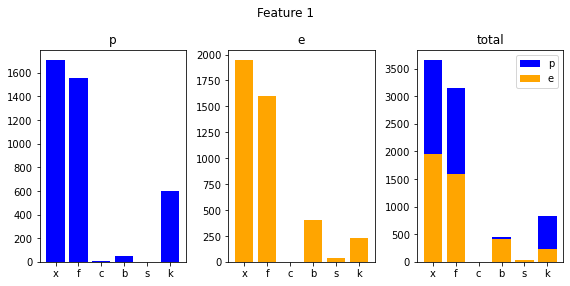

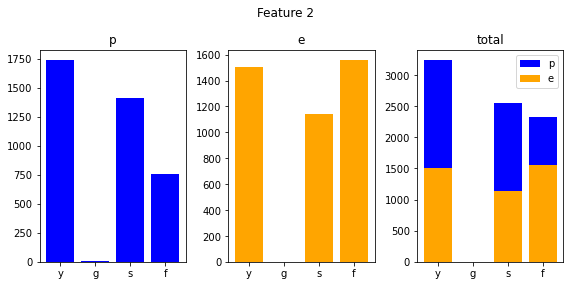

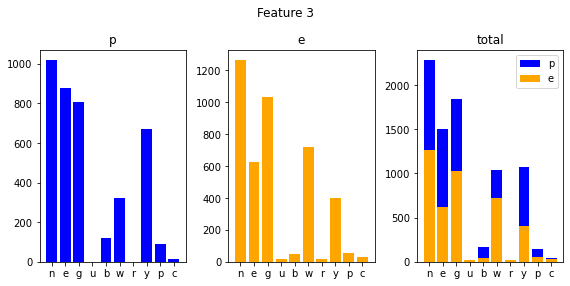

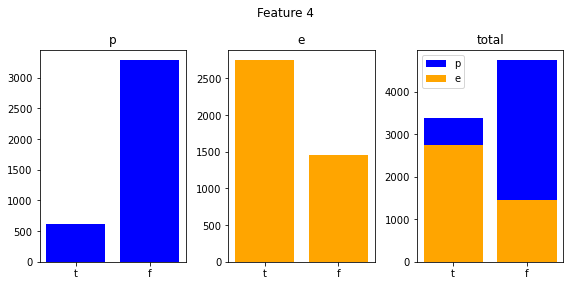

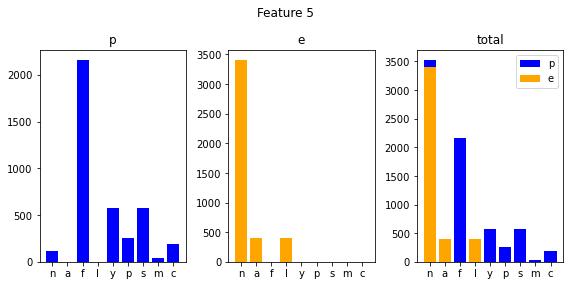

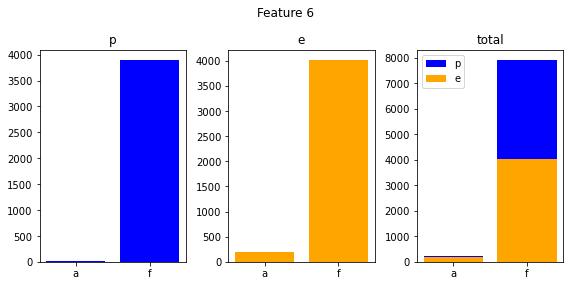

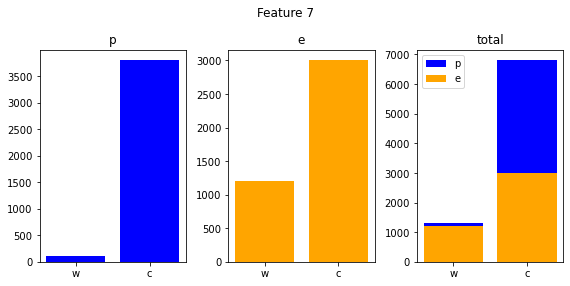

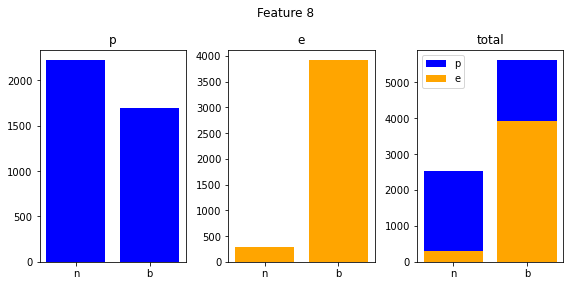

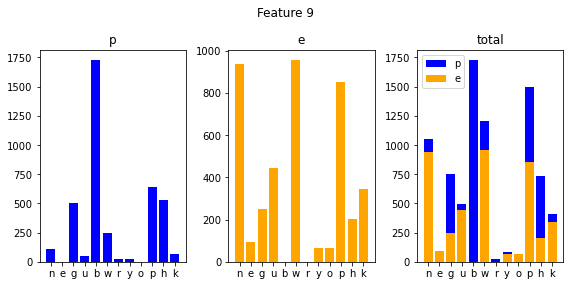

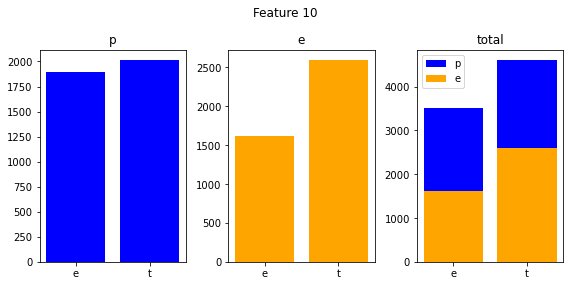

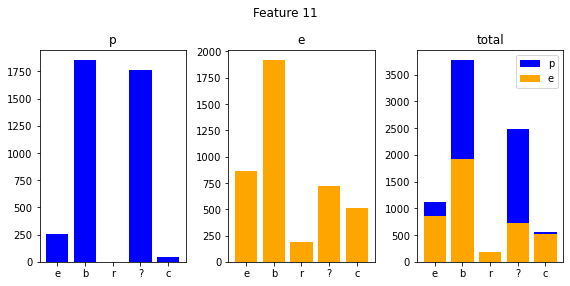

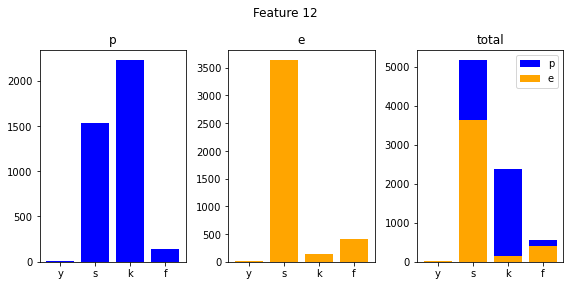

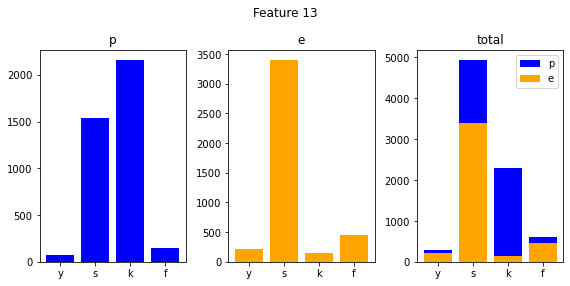

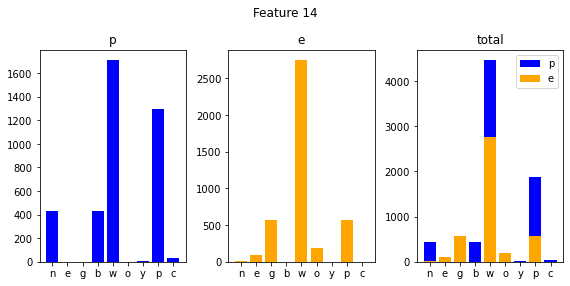

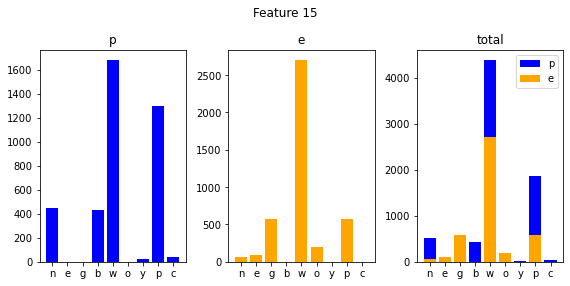

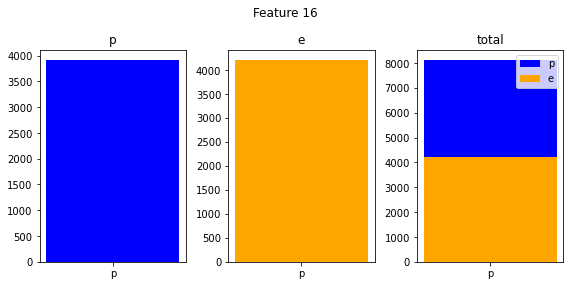

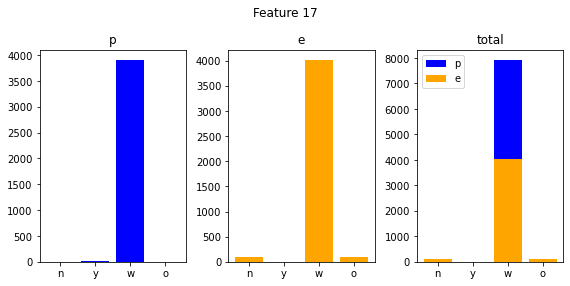

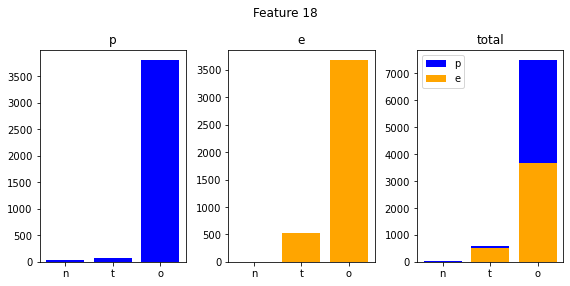

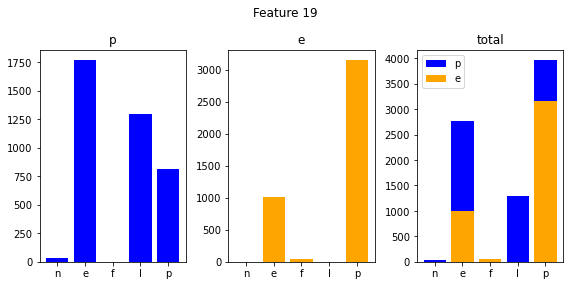

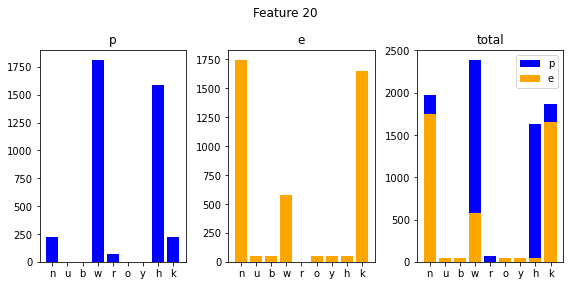

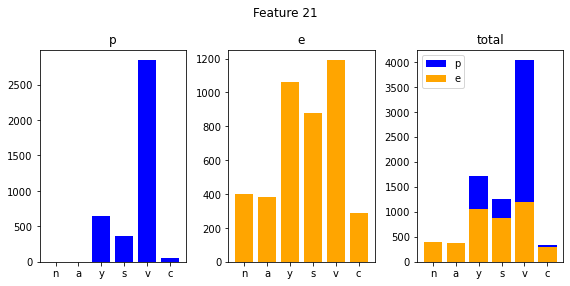

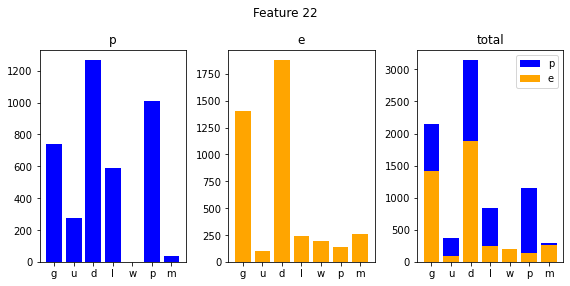

In [3]:
feature_symbols = []
for i in range(23):
    feature_symbols.append(list(set(dataset[i])))

p_dataset = dataset[dataset[0] == "p"]
e_dataset = dataset[dataset[0] == "e"]

p_feature_count = []
e_feature_count = []
for i in range(23):
    p_tmp = []
    e_tmp = []
    for symbol in feature_symbols[i]:
        p_tmp.append(len(p_dataset[p_dataset[i] == symbol]))
        e_tmp.append(len(e_dataset[e_dataset[i] == symbol]))
    p_feature_count.append(p_tmp)
    e_feature_count.append(e_tmp)
    
for i in range(1,23):
    fig, axs = plt.subplots(1,3)
    fig.suptitle('Feature '+str(i))
    
    axs[0].bar(feature_symbols[i], p_feature_count[i], color="blue")
    axs[0].set_title('p')
    
    axs[1].bar(feature_symbols[i], e_feature_count[i], color="orange")
    axs[1].set_title('e')

    l1 = axs[2].bar(feature_symbols[i], np.array(p_feature_count[i]) + np.array(e_feature_count[i]), color="blue")
    l2 = axs[2].bar(feature_symbols[i], e_feature_count[i], color="orange")
    axs[2].legend(handles=[l1, l2], labels=["p", "e"], loc="best")
    axs[2].set_title('total')
    
    fig.set_figwidth(8)
    fig.tight_layout(pad=1.0)
    
plt.show()


## 3. Data Preprocessing

In [4]:
for i in range(23):
    dataset = dataset[dataset[i] != "?"]

from sklearn.utils import shuffle
dataset = shuffle(dataset)

display(dataset)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
3509,e,f,y,g,t,n,f,c,b,n,...,s,g,w,p,w,o,p,k,v,d
2079,e,x,y,e,t,n,f,c,b,u,...,s,w,p,p,w,o,p,n,y,d
982,e,f,f,g,f,n,f,w,b,h,...,s,w,w,p,w,o,e,k,s,g
2667,e,x,f,e,t,n,f,c,b,n,...,s,g,g,p,w,o,p,k,y,d
1855,e,x,f,n,t,n,f,c,b,n,...,s,p,w,p,w,o,p,n,y,d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3841,e,f,f,e,t,n,f,c,b,u,...,s,p,w,p,w,o,p,n,y,d
1214,e,x,f,n,f,n,f,w,b,n,...,s,w,w,p,w,o,e,k,a,g
64,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,g
4314,p,x,y,y,f,f,f,c,b,p,...,k,n,b,p,w,o,l,h,y,p


## 4. Model Construction

In [5]:
class Naive_Bayes_Classifier:
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.k = 1
    
    def wo_laplace(self, data, label):
        ans = math.log(len(self.x[self.y == label])/len(self.x))
        for i in range(22):
            tmp = len(self.x[self.y == label][self.x[i+1] == data[i+1]])
            if tmp == 0:
                tmp = 1
            ans = ans + math.log(tmp/len(self.x[self.y == label]))
        return ans

    def with_laplace(self, data, label):
        ans = math.log(len(self.x[self.y == label])/len(self.x))
        for i in range(22):
            tmp = len(self.x[self.y == label][self.x[i+1] == data[i+1]]) + self.k
            ans = ans + math.log(tmp/(len(self.x[self.y == label]) + self.k * len(set(self.x[i+1]))))
        return ans
    
    def predict(self, x):
        result = []
        print(len(x))
        for i in range(len(x)):
            if(self.wo_laplace(x.iloc[i], 'p') > self.wo_laplace(x.iloc[i], 'e')):
                result.append('p')
            else:
                result.append('e')
            if i%100 == 0:
                print(i,"/",len(x),"done")
        return result

    def predict_with_laplace(self, x):
        result = []
        print(len(x))
        for i in range(len(x)):
            if(self.with_laplace(x.iloc[i], 'p') > self.with_laplace(x.iloc[i], 'e')):
                result.append('p')
            else:
                result.append('e')
            if i%100 == 0:
                print(i,"/",len(x),"done")
        return result
    
    def cal_confusion_matrix(self, x, y):
        result = self.predict(x)
        TP = FP = FN = TN = 0
        for i in range(len(result)):
            if result[i] == y.iloc[i] and result[i] == 'p':
              TP = TP + 1
            elif result[i] != y.iloc[i] and result[i] == 'p':
              FP = FP + 1
            elif result[i] != y.iloc[i] and result[i] == 'e':
              FN = FN + 1
            elif result[i] == y.iloc[i] and result[i] == 'e':
              TN = TN + 1
        confusion_matrix = pd.DataFrame([[TP,FP],[FN,TN]])
        confusion_matrix.columns = ['poisonous', 'edible']
        confusion_matrix.index = ['poisonous', 'edible']
        print("")
        return confusion_matrix

    def cal_confusion_matrix_with_laplace(self, x, y):
        result = self.predict_with_laplace(x)
        TP = FP = FN = TN = 0
        for i in range(len(result)):
            if result[i] == y.iloc[i] and result[i] == 'p':
              TP = TP + 1
            elif result[i] != y.iloc[i] and result[i] == 'p':
              FP = FP + 1
            elif result[i] != y.iloc[i] and result[i] == 'e':
              FN = FN + 1
            elif result[i] == y.iloc[i] and result[i] == 'e':
              TN = TN + 1
        confusion_matrix = pd.DataFrame([[TP,FP],[FN,TN]])
        confusion_matrix.columns = ['poisonous', 'edible']
        confusion_matrix.index = ['poisonous', 'edible']
        print("")
        return confusion_matrix
            

## 5. Train-Test-Split

In [6]:
x = dataset.iloc[:, 1:]
y = dataset[0]

x_training_set = x[: math.floor(len(x) * 0.7)]
y_training_set = y[: math.floor(len(y) * 0.7)]
x_validation_set = x[math.floor(len(x) * 0.7) :]
y_validation_set = y[math.floor(len(y) * 0.7) :]

print("Training data size: ", len(x_training_set))
print("Validation data size: ", len(x_validation_set))

x_K_fold_cross_validation = []
y_K_fold_cross_validation = []
for i in range(3):
    x_K_fold_cross_validation.append(x[math.floor(len(x) * 1/3 * i) : math.floor(len(x) * 1/3 * (i+1))])
    y_K_fold_cross_validation.append(y[math.floor(len(y) * 1/3 * i) : math.floor(len(y) * 1/3 * (i+1))])
    print("K_fold_cross_validation size "+str(i+1)+" : ", len(x_K_fold_cross_validation[i]))

Training data size:  3950
Validation data size:  1694
K_fold_cross_validation size 1 :  1881
K_fold_cross_validation size 2 :  1881
K_fold_cross_validation size 3 :  1882


## Holdout Training

In [7]:
model = Naive_Bayes_Classifier(x_training_set, y_training_set)

print("holdout predict")
holdout_confusion_matrix = model.cal_confusion_matrix(x_validation_set, y_validation_set)

print("holdout with laplace predict")
holdout_confusion_matrix_with_laplace = model.cal_confusion_matrix_with_laplace(x_validation_set, y_validation_set)

holdout predict
1694
0 / 1694 done


<ipython-input-5-7e0f52c61af4>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = len(self.x[self.y == label][self.x[i+1] == data[i+1]])


100 / 1694 done
200 / 1694 done
300 / 1694 done
400 / 1694 done
500 / 1694 done
600 / 1694 done
700 / 1694 done
800 / 1694 done
900 / 1694 done
1000 / 1694 done
1100 / 1694 done
1200 / 1694 done
1300 / 1694 done
1400 / 1694 done
1500 / 1694 done
1600 / 1694 done

holdout with laplace predict
1694
0 / 1694 done


<ipython-input-5-7e0f52c61af4>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = len(self.x[self.y == label][self.x[i+1] == data[i+1]]) + self.k


100 / 1694 done
200 / 1694 done
300 / 1694 done
400 / 1694 done
500 / 1694 done
600 / 1694 done
700 / 1694 done
800 / 1694 done
900 / 1694 done
1000 / 1694 done
1100 / 1694 done
1200 / 1694 done
1300 / 1694 done
1400 / 1694 done
1500 / 1694 done
1600 / 1694 done



## K-fold Training

In [8]:
order = [[0, 1, 2], [2, 0, 1], [1, 2, 0]]

k_fold_confusion_matrix = pd.DataFrame([[0,0],[0,0]])
k_fold_confusion_matrix.columns = ['poisonous', 'edible']
k_fold_confusion_matrix.index = ['poisonous', 'edible']

for i in range(3):
  print("k fold pridict round ", i)
  x_K_fold_cross_training_set = pd.concat([x_K_fold_cross_validation[order[i][0]],x_K_fold_cross_validation[order[i][1]]], axis=0)
  y_K_fold_cross_training_set = pd.concat([y_K_fold_cross_validation[order[i][0]],y_K_fold_cross_validation[order[i][1]]], axis=0)
  x_K_fold_cross_validation_set = x_K_fold_cross_validation[order[i][2]]
  y_K_fold_cross_validation_set = y_K_fold_cross_validation[order[i][2]]

  model = Naive_Bayes_Classifier(x_K_fold_cross_training_set, y_K_fold_cross_training_set)
  
  k_fold_confusion_matrix = k_fold_confusion_matrix + model.cal_confusion_matrix(x_K_fold_cross_validation_set, y_K_fold_cross_validation_set)

k_fold_confusion_matrix_with_laplace = pd.DataFrame([[0,0],[0,0]])
k_fold_confusion_matrix_with_laplace.columns = ['poisonous', 'edible']
k_fold_confusion_matrix_with_laplace.index = ['poisonous', 'edible']

for i in range(3):
  print("k fold with laplace pridict round ", i)
  x_K_fold_cross_training_set = pd.concat([x_K_fold_cross_validation[order[i][0]],x_K_fold_cross_validation[order[i][1]]], axis=0)
  y_K_fold_cross_training_set = pd.concat([y_K_fold_cross_validation[order[i][0]],y_K_fold_cross_validation[order[i][1]]], axis=0)
  x_K_fold_cross_validation_set = x_K_fold_cross_validation[order[i][2]]
  y_K_fold_cross_validation_set = y_K_fold_cross_validation[order[i][2]]

  model = Naive_Bayes_Classifier(x_K_fold_cross_training_set, y_K_fold_cross_training_set)
  
  k_fold_confusion_matrix_with_laplace = k_fold_confusion_matrix_with_laplace + model.cal_confusion_matrix_with_laplace(x_K_fold_cross_validation_set, y_K_fold_cross_validation_set)


k fold pridict round  0
1882
0 / 1882 done


<ipython-input-5-7e0f52c61af4>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = len(self.x[self.y == label][self.x[i+1] == data[i+1]])


100 / 1882 done
200 / 1882 done
300 / 1882 done
400 / 1882 done
500 / 1882 done
600 / 1882 done
700 / 1882 done
800 / 1882 done
900 / 1882 done
1000 / 1882 done
1100 / 1882 done
1200 / 1882 done
1300 / 1882 done
1400 / 1882 done
1500 / 1882 done
1600 / 1882 done
1700 / 1882 done
1800 / 1882 done

k fold pridict round  1
1881
0 / 1881 done
100 / 1881 done
200 / 1881 done
300 / 1881 done
400 / 1881 done
500 / 1881 done
600 / 1881 done
700 / 1881 done
800 / 1881 done
900 / 1881 done
1000 / 1881 done
1100 / 1881 done
1200 / 1881 done
1300 / 1881 done
1400 / 1881 done
1500 / 1881 done
1600 / 1881 done
1700 / 1881 done
1800 / 1881 done

k fold pridict round  2
1881
0 / 1881 done
100 / 1881 done
200 / 1881 done
300 / 1881 done
400 / 1881 done
500 / 1881 done
600 / 1881 done
700 / 1881 done
800 / 1881 done
900 / 1881 done
1000 / 1881 done
1100 / 1881 done
1200 / 1881 done
1300 / 1881 done
1400 / 1881 done
1500 / 1881 done
1600 / 1881 done
1700 / 1881 done
1800 / 1881 done

k fold with laplace 

<ipython-input-5-7e0f52c61af4>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = len(self.x[self.y == label][self.x[i+1] == data[i+1]]) + self.k


100 / 1882 done
200 / 1882 done
300 / 1882 done
400 / 1882 done
500 / 1882 done
600 / 1882 done
700 / 1882 done
800 / 1882 done
900 / 1882 done
1000 / 1882 done
1100 / 1882 done
1200 / 1882 done
1300 / 1882 done
1400 / 1882 done
1500 / 1882 done
1600 / 1882 done
1700 / 1882 done
1800 / 1882 done

k fold with laplace pridict round  1
1881
0 / 1881 done
100 / 1881 done
200 / 1881 done
300 / 1881 done
400 / 1881 done
500 / 1881 done
600 / 1881 done
700 / 1881 done
800 / 1881 done
900 / 1881 done
1000 / 1881 done
1100 / 1881 done
1200 / 1881 done
1300 / 1881 done
1400 / 1881 done
1500 / 1881 done
1600 / 1881 done
1700 / 1881 done
1800 / 1881 done

k fold with laplace pridict round  2
1881
0 / 1881 done
100 / 1881 done
200 / 1881 done
300 / 1881 done
400 / 1881 done
500 / 1881 done
600 / 1881 done
700 / 1881 done
800 / 1881 done
900 / 1881 done
1000 / 1881 done
1100 / 1881 done
1200 / 1881 done
1300 / 1881 done
1400 / 1881 done
1500 / 1881 done
1600 / 1881 done
1700 / 1881 done
1800 / 1881 

## 6. Results

In [9]:
print("Holdout: ")
display(holdout_confusion_matrix)

print("")

print("Holdout laplace: ")
display(holdout_confusion_matrix_with_laplace)

print("") 

print("K-fold: ")
display(k_fold_confusion_matrix)

print("")

print("K-fold Laplace: ")
display(k_fold_confusion_matrix_with_laplace)

def matrix_transform(matrix):
  TP = matrix["poisonous"]["poisonous"]
  FP = matrix["poisonous"]["edible"]
  FN = matrix["edible"]["poisonous"]
  TN = matrix["edible"]["edible"]
  
  accuracy = (TP+TN)/(TP+FP+FN+TN)
  precision = TP/(TP+FP)
  Recall = TP/(TP+FN)
  return accuracy, precision, Recall

summary = []
summary.append(matrix_transform(holdout_confusion_matrix))
summary.append(matrix_transform(holdout_confusion_matrix_with_laplace))
summary.append(matrix_transform(k_fold_confusion_matrix))
summary.append(matrix_transform(k_fold_confusion_matrix_with_laplace))

summary = pd.DataFrame(summary)
summary.columns = ["Accuracy", "Precision", "Sensitivity"]
summary.index = ["Holdout", "Holdout Laplace", "K-fold", "K-fold Laplace"]

print("\nSummary: ")
display(summary)

Holdout: 


,poisonous,edible
poisonous,574,4
edible,52,1064



Holdout laplace: 


,poisonous,edible
poisonous,574,4
edible,52,1064



K-fold: 


,poisonous,edible
poisonous,1990,15
edible,166,3473



K-fold Laplace: 


,poisonous,edible
poisonous,1993,15
edible,163,3473



Summary: 


,Accuracy,Precision,Sensitivity
Holdout,0.966942,0.916933,0.993080
Holdout Laplace,0.966942,0.916933,0.993080
K-fold,0.967931,0.923006,0.992519
K-fold Laplace,0.968462,0.924397,0.992530


## 8. Question

[0.01834862385321101, 0.1651376146788991, 0.0, 0.6513761467889908, 0.0, 0.1651376146788991, 0.0]
[0.01859799713876967, 0.16509298998569386, 0.0002861230329041488, 0.6503576537911302, 0.0002861230329041488, 0.16509298998569386, 0.0002861230329041488]


<ipython-input-10-784f3dca6a00>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = len(dataset[dataset[0] == 'e'][dataset[15] == symbol])
<ipython-input-10-784f3dca6a00>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = len(dataset[dataset[0] == 'e'][dataset[15] == symbol]) + 1


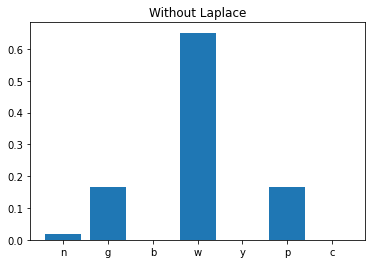

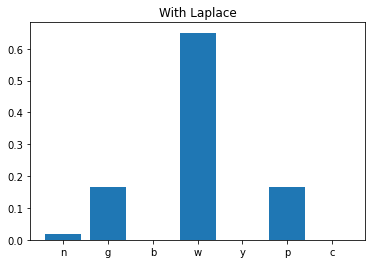

In [10]:
symbols = list(set(dataset[15]))

count = []
for symbol in symbols:
    tmp = len(dataset[dataset[0] == 'e'][dataset[15] == symbol])
    count.append(tmp/len(dataset[dataset[0] == 'e']))
    
count_with_laplace = []
for symbol in symbols:
    tmp = len(dataset[dataset[0] == 'e'][dataset[15] == symbol]) + 1
    count_with_laplace.append(tmp/(len(dataset[dataset[0] == 'e']) + 1 * len(symbols)))

plt.figure()
plt.title("Without Laplace")
plt.bar(symbols, count)

plt.figure()
plt.title("With Laplace")
plt.bar(symbols, count_with_laplace)

print(count)
print(count_with_laplace)